In [2]:
from Bio import SeqIO

# cara pertama (parse)
for x in SeqIO.parse("sequence.fasta", "fasta"):
    print(x.id)
    print(x.name)
    sequence = x.seq
    print(sequence)

# cara kedua (read)
file = SeqIO.read("sequence.gb", "genbank")
sequence1 = file.seq
print(sequence1)

MN908947.3
MN908947.3
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAAT

In [3]:
# ngambil 10 pertama dari sequence
seq1 = sequence1[:10:]
print(seq1)

# ngambil 20 dari index 3 dengan lompatan 4
slicing1 = sequence1[3:20:4]
print(slicing1)

ATTAAAGGTT
AGACC


In [4]:
# reverse
reverse = seq1[::-1]
print(reverse)

TTGGAAATTA


In [5]:
# join (gabungin 10 pertama sama yang di reverse)
seq_join = seq1 + reverse
print(seq_join)

ATTAAAGGTTTTGGAAATTA


In [6]:
# replace (A jadi T) (T jadi A)
# nama_sequence.replace("huruf yg mau digangti", "diganti dengan huruf apa")
seq_replace = str(seq_join).replace("A", "T")
seq_replace = str(seq_join).replace("T", "A")

print(seq_join)
print(seq_replace)

ATTAAAGGTTTTGGAAATTA
AAAAAAGGAAAAGGAAAAAA


In [6]:
from Bio.SeqUtils import MeltingTemp as mt

# wallace
melting_wallace = mt.Tm_Wallace(sequence1)
print("Melting Temp Sequence 1 (wallace) =", melting_wallace)

# GC
melting_GC = mt.Tm_GC(sequence1)
print("Melting Temp Sequence 1 (GC) =", melting_GC)

# NN
melting_NN = mt.Tm_NN(sequence1)
print("Melting Temp Sequence 1 (NN) =", melting_NN)

Melting Temp Sequence 1 (wallace) = 82516.0
Melting Temp Sequence 1 (GC) = 75.4516764424424
Melting Temp Sequence 1 (NN) = 77.76492619134928


In [7]:
from Bio.SeqUtils import GC

In [8]:
# gc
gc = GC(sequence1)
print(gc)

37.97277865097148


c:\Python311\Lib\site-packages\Bio\SeqUtils\__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


In [18]:
# at

# cara pertama
at1 = 100 - gc

# cara kedua
at2 = 100 - GC(sequence1)

# cara ketiga
# def AT(seq):
#     return (seq.count('A') + seq.count('T')) / len(seq) * 100

# print(AT(gc))
print(at1)
print(at2)

62.02722134902852
62.02722134902852


In [50]:
# Molecular Weight
from Bio.SeqUtils import molecular_weight as mw

molWeight = mw(sequence1)
print("Molecular Weight =", molWeight)

Molecular Weight = 9241219.214400413


In [38]:
# 
from collections import Counter as co
counter = co(sequence1)
key = counter.keys()
value = counter.values()
print(key)
print(value)

dict_keys(['A', 'T', 'G', 'C'])
dict_values([8954, 9594, 5863, 5492])


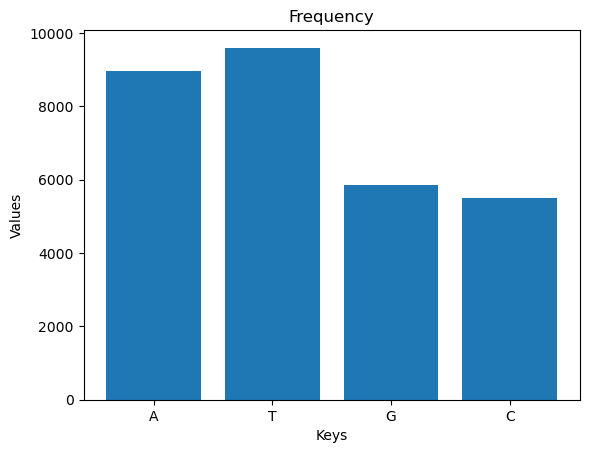

In [43]:
from matplotlib import pyplot as plt
plt.bar(key, value)
plt.title("Frequency")
plt.ylabel("Values")
plt.xlabel("Keys")
plt.show()

In [49]:
# cara mengubah dan menjadi mrna (transcribe)
mrna = seq1.transcribe()
print("mRNA =", mrna)

mRNA = AUUAAAGGUU


In [54]:
# cara mengubah mrna menjadi asam amino (translate)
asam_amino = mrna.translate()
print("Asam amino =", asam_amino)

Asam amino = IKG


c:\Anaconda3\envs\comp_bio\lib\site-packages\Bio\Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [58]:
from Bio.Seq import Seq

# membuat sequence baru
seq2 = Seq("GCATGCATGC")

# mencari panjang sequence
panjang = len(seq2)
print("Panjang dari sequence 2 =", panjang)

Panjang dari sequence 2 = 10


In [66]:
# mencari local alignment
from Bio import pairwise2

pairwise2.align.localxx(seq1, seq2) # semua
pairwise2.align.localxx(seq1, seq2, one_alignment_only = True) # hanya satu baris
pairwise2.align.localxx(seq1, seq2, score_only = True) # hasil saja

4.0

In [68]:
# global alignment
pairwise2.align.globalxx(seq1, seq2)

4.0

In [69]:
# hamming distance
hamming_distance = len([(x, y) for x,y in zip(seq1, seq2) if x != y])
print(hamming_distance)

10


In [7]:
# levenshtein
from Levenshtein import distance

distance(seq1, seq2)

NameError: name 'seq2' is not defined

In [73]:
# dot plot
def dot_plot(seq1, seq2):
    blank = ' '
    fill = chr(0x25A0)
    print(' |' + seq1)
    for i in seq2:
        print(i + '|', end='')
        for j in seq1:
            if i == j:
                print(fill,end='')
            else:
                print(blank,end='')
        print()
dot_plot(seq1, seq2)


 |ATTAAAGGTT
G|      ■■  
C|          
A|■  ■■■    
T| ■■     ■■
G|      ■■  
C|          
A|■  ■■■    
T| ■■     ■■
G|      ■■  
C|          
